In [37]:
import pandas as pd 
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [38]:
# from bs4 import BeautifulSoup
# import csv
# from selenium import webdriver
# from selenium.webdriver.chrome.options import Options
# from selenium_stealth import stealth
# import time

# # Xác định số lượng trang phân trang
# num_pages = 204

# # Tạo danh sách các đường dẫn đến các trang phân trang
# urls = [f'https://alonhadat.com.vn/nha-dat/can-ban/dat-tho-cu-dat-o/1/ha-noi/trang--{i}.html' for i in range(2, num_pages+1)]

# # Tạo file CSV và ghi tiêu đề
# with open('alonhadat.csv', mode='w', newline='', encoding='utf-8-sig') as file:
#    fieldnames = ['stt','title','road','parking','square', 'price','dis_q','dis','date']
#    writer = csv.DictWriter(file, fieldnames=fieldnames)
#    writer.writeheader()
#     # Lặp qua danh sách các đường dẫn và crawl thông tin từ mỗi trang
#    index = 1
#    i=0
#    while i<num_pages:
#       options = Options()
#       options.add_argument("start-maximized")
#       options.add_experimental_option("excludeSwitches", ["enable-automation"])
#       options.add_experimental_option('useAutomationExtension', False)
#       driver = webdriver.Chrome(options=options)
#       stealth(driver,
#           languages=["en-US", "en"],
#             vendor="Google Inc.",
#             platform="Win32",
#          webgl_vendor="Intel Inc.",
#          renderer="Intel Iris OpenGL Engine",
#          fix_hairline=True,
#          )

#       url = urls[i]
#       driver.get(url)
#        # mở url bằng trình duyệt
#       html = driver.page_source # lấy nội dung html
#       soup = BeautifulSoup(html, 'html.parser')
#       real_estates = soup.find_all(class_='content-item')
#       divs = soup.find_all("div") # tìm tất cả các thẻ div
#       #print(divs)
#       s=''
#       for div in divs:
#          class_value = div.get("class") # lấy giá trị của thuộc tính class
#          if class_value:
#             s = str(class_value[0])
#          if s=='g-recaptcha-bubble-arrow':
#             time.sleep(60) 
#             i=i-1
#             break # thoát khỏi vòng lặp
#       #print(real_estates)
#       print(i,' ',index)
#       i=i+1
#          # Lặp qua danh sách các tin
#       for real_estate in real_estates:
#             # giá đất 
#          price_element = real_estate.find(class_='ct_price').text.strip()
#          price= price_element.split(":")[1].strip() # Lấy phần thứ 2 của chuỗi sau khi đã tách
#             # diện tích 
#          square_element = real_estate.find(class_='ct_dt').text.strip()
#          square_value_str = square_element.split(":")[1].strip()
#          square_value_str = square_value_str.replace(".", "") 
#          square_value_str = square_value_str.replace(",", ".") 
#          square = float(square_value_str[:-3]) 
#             # địa chỉ 
#          dis = real_estate.find(class_='ct_dis').text.strip()
#          lst = dis.split(',')
#             # Lấy giá trị địa chỉ quận huyện ở hà nội 
#          dis_q = lst[-2].strip()
#             # đường trước nhà
#          road_element = real_estate.find('span', {'class': 'road-width'})
#          if road_element:
#             road = road_element.text.strip()
#          else:
#             road = ''
#             # lầu 
#          floor_element = real_estate.find('span', {'class': 'floors'})
#             # floor_value = floor.split()[0] # Lấy phần thứ 2 của chuỗi sau khi đã tách
#          if floor_element:
#             floor = floor_element.text.strip().split()[0]
#          else:
#             floor = ''
#             # phòng ngủ 
#          bedroom_element = real_estate.find('span', {'class': 'bedroom'})
#             # floor_value = floor.split()[0] # Lấy phần thứ 2 của chuỗi sau khi đã tách
#          if bedroom_element:
#             bedroom = bedroom_element.text.strip().split()[0]
#          else:
#             bedroom = ''
#             # chỗ để xe 
#          parking_element =  real_estate.find('span', {'class': 'parking'})
#          if parking_element:
#             parking = 1
#          else:
#             parking = 0
#             # ngày đăng
#          date = real_estate.find(class_='ct_date').text.strip()
#          title = real_estate.find(class_='ct_title').text.strip()
#          writer.writerow({'stt': index,'title':title, 'road':road, 'parking':parking, 'square':square,'price':price,
#                              'dis_q':dis_q,'dis':dis,'date':date})
#          index += 1
#          if index==3501:
#             driver.quit()
#             sys.exit()
#       else:
#         driver.quit()

In [39]:
df = pd.read_csv('SmallDS.csv')    
print(df['road'].dtype)

# Lưu vào file CSV
df.to_csv('output.csv', index=False,encoding='utf-8-sig')

object


In [40]:
import csv

# định nghĩa tên của tập tin input và output
INPUT_FILE = 'output.csv'
OUTPUT_FILE = 'output1.csv'
data = []
# chuyen trieu sang m2
with open(INPUT_FILE, newline='', encoding='utf-8') as input_file:
    
    reader = csv.DictReader(input_file)
    
    for row in reader:
        if row['price'].endswith('triệu'):
            price_value = float(row['price'].split(' ')[0].replace(',', '.'))
            new_price_value = round(price_value / float(row['square']), 2)
            row['price'] = new_price_value
        elif row['price'].endswith('tỷ'):
            price_value = float(row['price'].split(' ')[0].replace(',', '.'))
            new_price_value = round(price_value * 1000 / float(row['square']), 2)
            row['price'] = new_price_value
        elif row['price'].endswith('m2'):
            price_value = float(row['price'].split(' ')[0].replace(',', '.'))
            row['price'] = price_value
        data.append(row)
fieldnames = ['square', 'price']
# Lọc các khóa không nằm trong danh sách fieldnames
filtered_data = []
for row in data:
    filtered_row = {key: row.pop(key) for key in list(row) if key in fieldnames}
    filtered_data.append(filtered_row)
# ghi dữ liệu đã được cập nhật vào tập tin output
with open(OUTPUT_FILE, 'w', newline='',encoding='utf-8') as output_file:   
    writer = csv.DictWriter(output_file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(filtered_data)
print('Tập tin CSV đã được cập nhật thành công!')


Tập tin CSV đã được cập nhật thành công!


In [41]:
df = pd.read_csv('output.csv')    
df1 = pd.read_csv('output1.csv')  

df['square'] = df1['square']
df['price'] = df1['price']
df['price'] = pd.to_numeric(df['price'],errors='coerce')

# Thay thế tất cả các giá trị có dạng '[số]m' thành '[số]'
df['road'] = df['road'].str.replace(r'\d+m', lambda x: x.group()[:-1])
df['road'] = df['road'].str.replace(",",".")
df['road'] = pd.to_numeric(df['road'], errors='coerce')
print(df['road'].dtype)

df['total_price']= df['square']*df['price']
print(len(df))
df.drop_duplicates(subset=['title','price','square','dis'],inplace=True)
print(len(df))

float64
1043
1027


C:\Users\Thanh Dat\AppData\Local\Temp\ipykernel_25564\2046288650.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['road'] = df['road'].str.replace(r'\d+m', lambda x: x.group()[:-1])


In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
datas=[]    #ten quận
prices=[]   #gia /m2
nums=[]     #dem so lan xuat hien cua 1 quân/ sap xep gia tien sau khi chia so lan xuat hien
encode=[]   #Sap xep quận giá tiền/m2
encodes=[]  #Chèn encodes vào df
for address in df['dis']:
    dis_parts = address.split(", ")
    dis_last_2_parts = dis_parts[-3:-1]
    dis_last_2_parts_str = ", ".join(dis_last_2_parts)  # chuyển thành chuỗi duy nhất
    datas.append(dis_last_2_parts_str)
df["dis_last_2_parts_str"] = datas
datas=[]
for index, row in df.iterrows():
    if row[10] not in datas:
        datas.append(row[10])
        prices.append(row[5])
        nums.append(1)
    else:
       prices[datas.index(row[10])]+=row[5]
       nums[datas.index(row[10])]+=1
for i in range(0,len(datas)):
    prices[i]=prices[i]/nums[i]
    nums[i]=prices[i]
nums.sort(reverse=False)
for i in range(0,len(datas)):
    encode.append(nums.index(prices[i]))
    print(datas[i],' ',prices[i],' ',nums[i],' ',encode[i])
for index, row in df.iterrows():
    encodes.append(encode[datas.index(row[10])])
    #print(row[6],' ',encode[datas.index(row[6])])
df["Encoded Addresses"] = encodes
# # Lưu vào file CSV
# df.to_csv('output2.csv', index=False,encoding='utf-8-sig')


Phường Dịch Vọng, Quận Cầu Giấy   246.84692307692305   3.7   223
Phường Ngọc Hà, Quận Ba Đình   203.33   4.5   207
Phường Đông Ngạc, Quận Bắc Từ Liêm   74.34444444444443   4.67   137
Phường Cầu Diễn, Quận Nam Từ Liêm   116.49333333333333   4.96   173
Phường Nghĩa Đô, Quận Cầu Giấy   226.15400000000005   5.22   217
Phường Xuân La, Quận Tây Hồ   167.78   6.0   194
Phường Nhật Tân, Quận Tây Hồ   148.64874999999998   7.0   190
Phường Cổ Nhuế 1, Quận Bắc Từ Liêm   110.018   7.5   170
Phường Quan Hoa, Quận Cầu Giấy   216.73600000000002   7.5   212
Phường Ô Chợ Dừa, Quận Đống Đa   213.73000000000002   7.59   209
Phường Tây Tựu, Quận Bắc Từ Liêm   35.86   8.0   77
Phường Phúc Đồng, Quận Long Biên   102.42166666666667   8.0   165
Phường Bồ Đề, Quận Long Biên   143.07266666666666   8.04   188
Phường Ngọc Thụy, Quận Long Biên   81.96071428571429   8.85   145
Phường Thạch Bàn, Quận Long Biên   82.189375   9.0   146
Xã Thanh Lâm, Huyện Mê Linh   16.622500000000002   9.21   36
Thị trấn Quang Minh,

#### Mô tả dữ liệu

##### 1. Hiển thị số mẫu và số đặc trưng của 1 mẫu trong tập dữ liệu

In [43]:
print(df.shape)

(1027, 12)


##### 2. Hiển thị kiểu dữ liệu của mỗi đặc trưng trong tập dữ liệu

In [44]:
print(df.dtypes)

stt                       int64
title                    object
road                    float64
parking                   int64
square                  float64
price                   float64
dis_q                    object
dis                      object
date                     object
total_price             float64
dis_last_2_parts_str     object
Encoded Addresses         int64
dtype: object


##### 3. Hiển thị số mẫu dữ liệu trống của mỗi đặc trưng trong tập dữ liệu

In [45]:
print(df.isnull().sum())

stt                     0
title                   0
road                    2
parking                 0
square                  0
price                   0
dis_q                   0
dis                     0
date                    0
total_price             0
dis_last_2_parts_str    0
Encoded Addresses       0
dtype: int64


4.Thống kê mô tả trực quan về các đặc trưng 

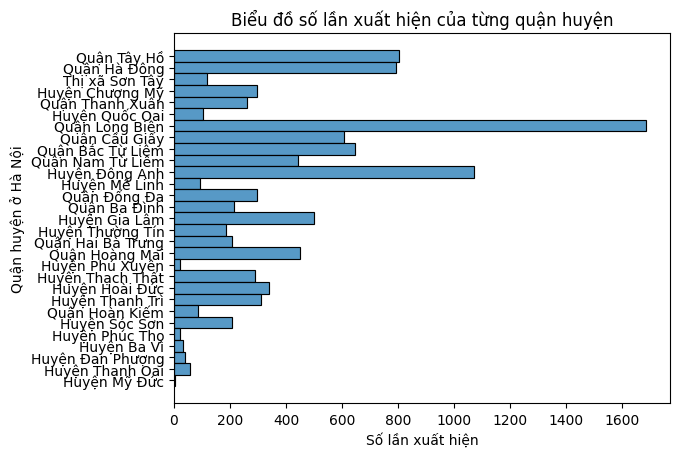

In [46]:
# Biểu đồ số lần xuất hiện của từng quận huyện
import csv
values = []
with open('output2.csv', encoding='utf-8-sig') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dis_q_value = row['dis_q']
        values.append(dis_q_value)

sns.histplot(values, y=values)  # Đổi tham số x thành y
plt.xlabel('Số lần xuất hiện')
plt.ylabel('Quận huyện ở Hà Nội')  # Đổi nhãn trục x thành y
plt.title('Biểu đồ số lần xuất hiện của từng quận huyện')
# plt.xticks(rotation=90)
plt.show()

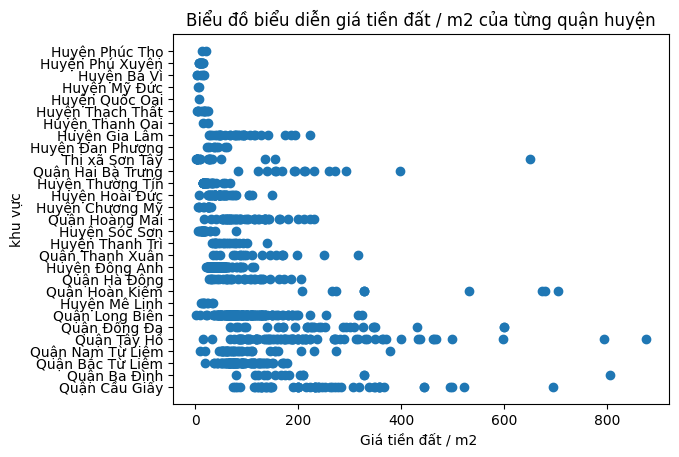

In [47]:
# Biểu đồ biểu diễn giá tiền đất / m2 của từng quận huyện
price = df['price']
area = df['dis_q']
plt.scatter( price,area)
plt.title('Biểu đồ biểu diễn giá tiền đất / m2 của từng quận huyện')
plt.xlabel('Giá tiền đất / m2 ')
plt.ylabel('khu vực')
# plt.xticks(rotation=90) 
plt.show()

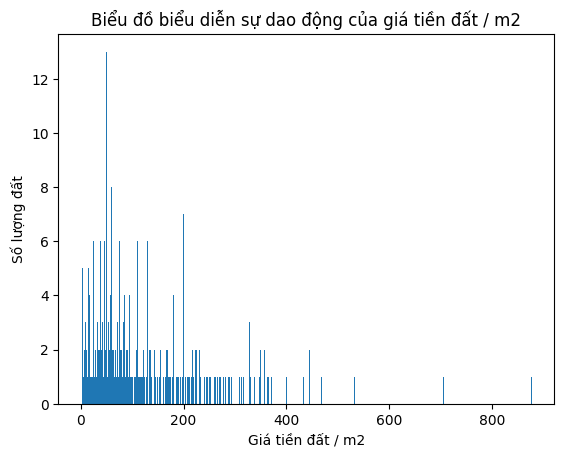

In [48]:
# Biểu đồ biểu diễn sự dao động của giá tiền đất / m2
price = df['price']
# Đếm số lượng xuất hiện 
value_counts = price.value_counts()
#  giá trị tăng dần
value_counts_sorted = value_counts.sort_index()
plt.title('Biểu đồ biểu diễn sự dao động của giá tiền đất / m2')
plt.bar(value_counts_sorted.index, value_counts_sorted.values)
plt.xlabel('Giá tiền đất / m2')
plt.ylabel('Số lượng đất')
plt.show()


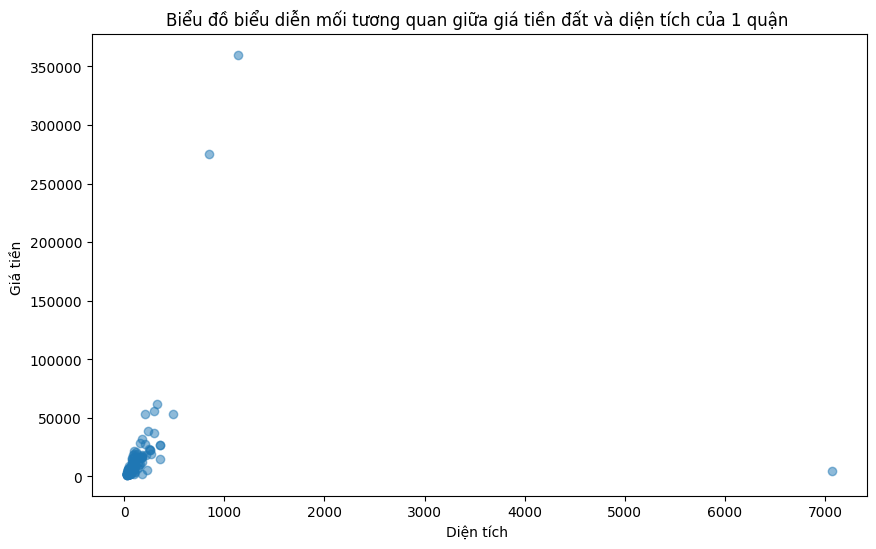

In [49]:
# Biểu đồ biểu diễn mối tương quan giữa giá tiền đất và diện tích của 1 quận 
square = df['square'] 
total_price = df['total_price']
square = square[df['dis_q'] == 'Quận Long Biên'] 
plt.figure(figsize=(10, 6))
plt.scatter(square, total_price[df['dis_q'] == 'Quận Long Biên'], alpha=0.5)
plt.title('Biểu đồ biểu diễn mối tương quan giữa giá tiền đất và diện tích của 1 quận ')
plt.xlabel('Diện tích ')
plt.ylabel('Giá tiền ')
plt.show()

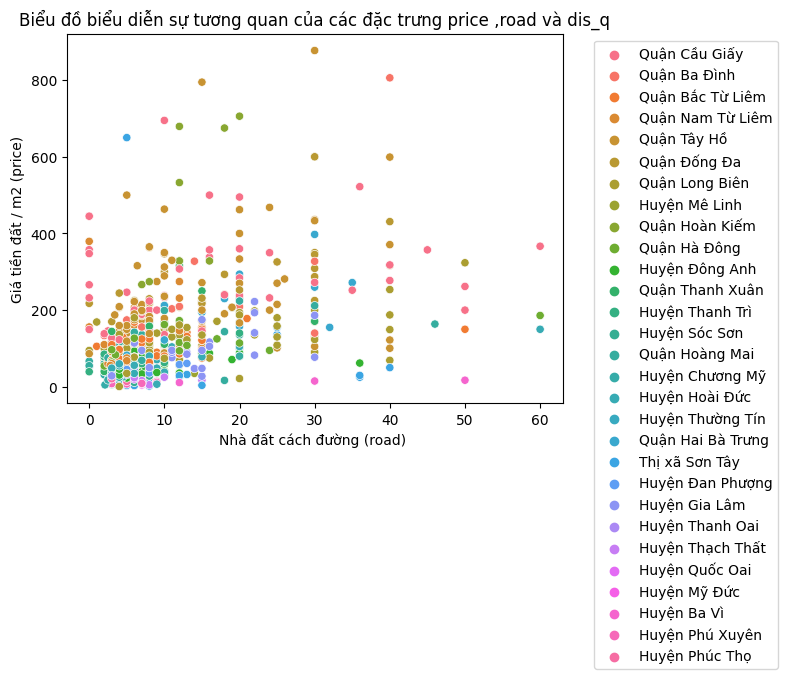

In [50]:
# Biểu đồ biểu diễn sự tương quan của các đặc trưng price ,road và dis_q
road = df['road']
price = df['price']
dis_q = df['dis_q']
sns.scatterplot(x=road, y=price, hue=dis_q)
plt.title('Biểu đồ biểu diễn sự tương quan của các đặc trưng price ,road và dis_q')
plt.xlabel('Nhà đất cách đường (road) ')
plt.ylabel('Giá tiền đất / m2 (price)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

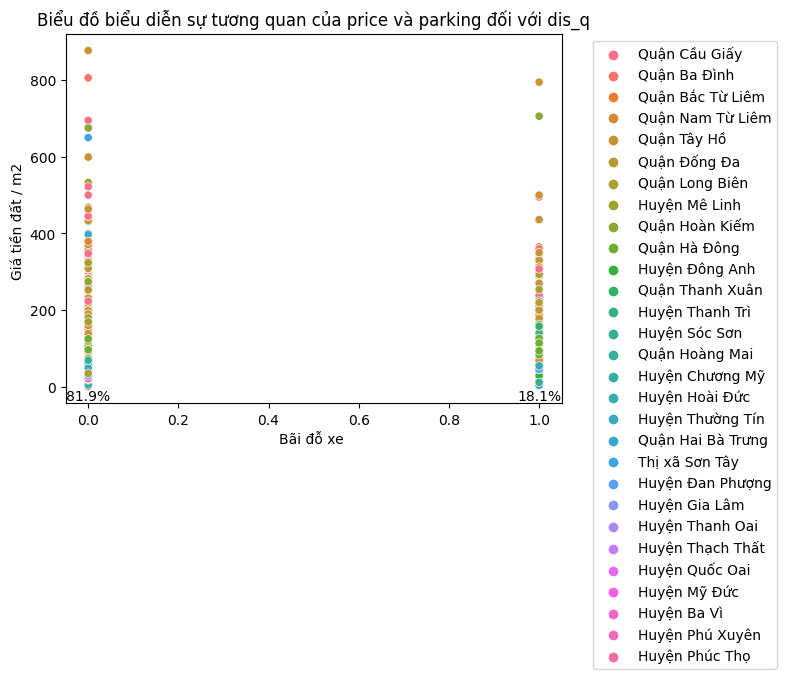

In [51]:
# Biểu đồ biểu diễn sự tương quan của các đặc trưng price ,parking và dis_q
parking = df['parking']
price = df['price']
dis_q = df['dis_q']
parking_percent = parking.value_counts(normalize=True) * 100
sns.scatterplot(x=parking, y=price, hue=dis_q)
plt.title('Biểu đồ biểu diễn sự tương quan của price và parking đối với dis_q')
plt.xlabel('Bãi đỗ xe ')
plt.ylabel('Giá tiền đất / m2 ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for value, percent in parking_percent.items():
    plt.text(value, plt.ylim()[0], f'{percent:.1f}%', ha='center', va='bottom')

plt.show()

C:\Users\Thanh Dat\AppData\Local\Temp\ipykernel_25564\108914565.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df2.corr()


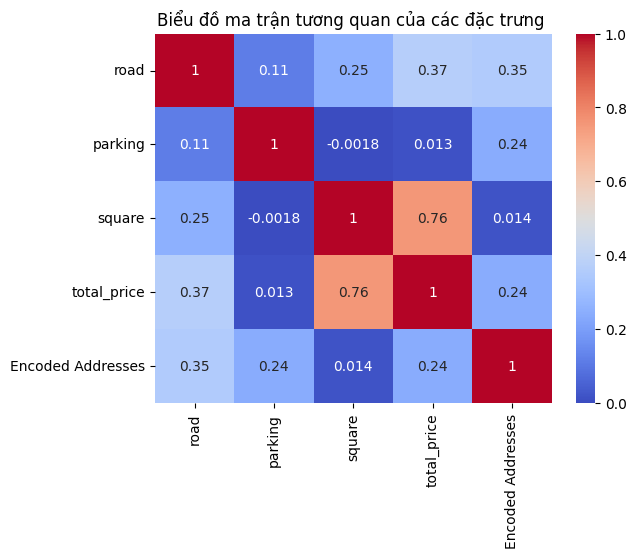

In [52]:
# biểu đồ tương quan giữa các đặc trưng
df2 = df.drop(['stt', 'price'], axis=1)
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Biểu đồ ma trận tương quan của các đặc trưng ')
plt.show()

#### Chia dữ liệu

In [53]:
# Chia dữ liệu thành 3 tập: huấn luyện, xác thực và kiểm thử 60 20 20
train_data, test_data, train_target, test_target = train_test_split(df[['road','square','Encoded Addresses',]], df[['total_price']], test_size=0.4, random_state=0)
test_data, valid_data, test_target, valid_target = train_test_split(test_data[['road','square','Encoded Addresses']], test_target[['total_price']], test_size=0.5, random_state=0)


#### Xu ly du lieu trong

In [54]:
import numpy as np
def mean_func(train,valid, test,feat): 
    mean_value = train[feat].mean()
    train[feat] = train[feat].fillna(mean_value)
    
    valid[feat] = valid[feat].fillna(mean_value)
    test[feat] = test[feat].fillna(mean_value)
    return train, valid ,test

In [55]:
train_data,valid_data,test_data = mean_func(train_data,valid_data,test_data,'road')

train_target,valid_target,test_target = mean_func(train_target,valid_target,test_target,'total_price')

print(train_data.isnull().sum())

road                 0
square               0
Encoded Addresses    0
dtype: int64


#### Trước khi xử lý ngoại lệ

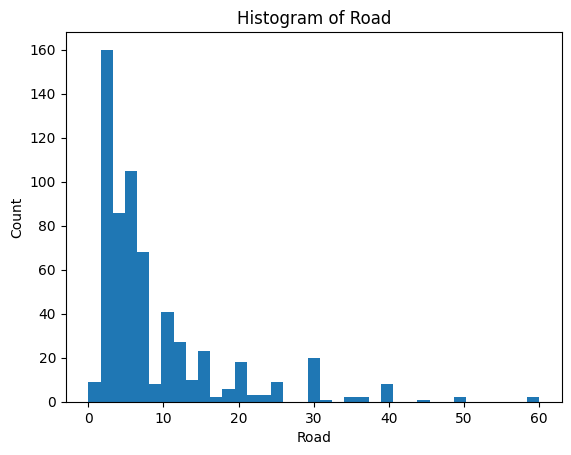

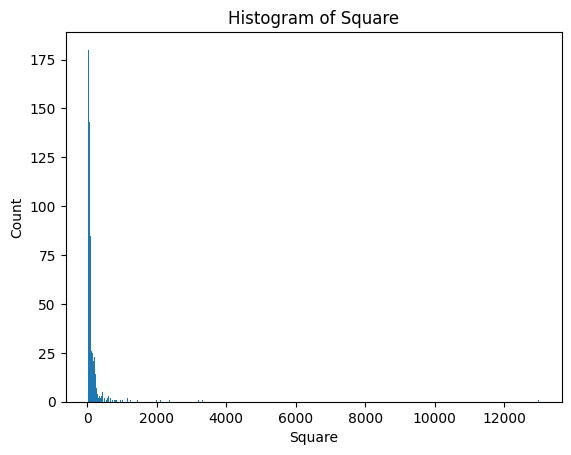

In [56]:
cols = ['road','square']
#cols = ['road']
for col in cols:
    plt.hist(train_data[col], bins='auto')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.title('Histogram of '+ col.capitalize())
    plt.show()

In [57]:
def skewed (train,valid,test,feat): 
    IQR = train[feat].quantile(0.75) - train[feat].quantile(0.25)
    lower_bridge = train[feat].quantile(0.25) - 1.5*IQR
    upper_bridge = train[feat].quantile(0.75) + 1.5*IQR

    train.loc[train[feat]>= upper_bridge,feat] = upper_bridge
    train.loc[train[feat]<=lower_bridge,feat] = lower_bridge
    
    valid.loc[valid[feat]>= upper_bridge,feat] = upper_bridge
    valid.loc[valid[feat]<=lower_bridge,feat] = lower_bridge

    test.loc[test[feat]>= upper_bridge,feat] = upper_bridge
    test.loc[test[feat]<=lower_bridge,feat] = lower_bridge

    return train,valid,test

In [58]:
train_data_copy = train_data
valid_data_copy = valid_data
test_data_copy = test_data

train_data,valid_data,test_data = skewed(train_data,valid_data,test_data,'road')
train_data,valid_data,test_data = skewed(train_data,valid_data,test_data,'square')




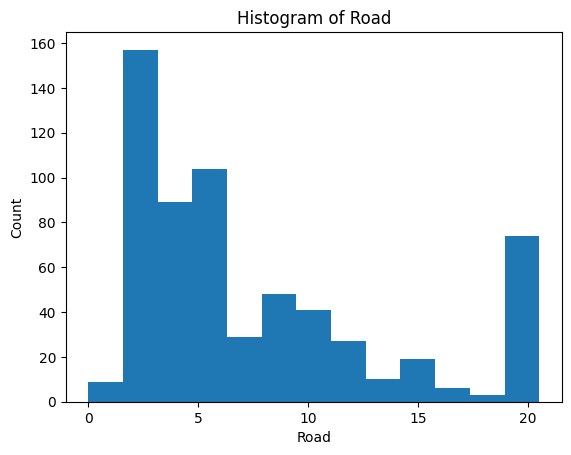

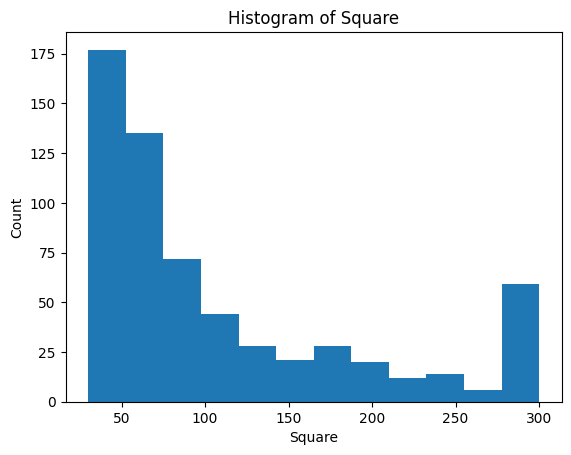

In [59]:
cols = ['road','square']
#cols = ['road'] 
for col in cols:
    plt.hist(train_data[col], bins='auto')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.title('Histogram of '+ col.capitalize())
    plt.show()

# Chuan hoa

In [60]:
from sklearn.preprocessing import Normalizer
def normalizer_func(train,val,test): 
    feature_names = ['road','square']
    #feature_names = ['road']
    normalizer = Normalizer(copy=True)
    nor_data = normalizer.fit_transform(train[feature_names])
    df_train = pd.DataFrame(nor_data,columns=feature_names)
    
    nor_data1 = normalizer.transform(val[feature_names])
    df_val = pd.DataFrame(nor_data1,columns=feature_names)

    nor_data2 = normalizer.transform(test[feature_names])
    df_test = pd.DataFrame(nor_data2,columns=feature_names)
    return df_train,df_val,df_test

In [61]:
# Khởi tạo bộ chuẩn hóa
# normalizer = Normalizer()
# Chuẩn hóa dữ liệu
train_data_norm,valid_data_norm ,test_data_norm = normalizer_func(train_data,valid_data,test_data)


##### Tạo bảng so sánh trên tập test

In [62]:
# Tên các cột
column_names = ['LinearRegression', 'RandomForest']
row_names = ['train', 'train_outlier', 'train_scale_outlier']
accuracy = pd.DataFrame(columns=column_names, index=row_names)

# Tên các cột
column_names = ['LinearRegression', 'RandomForest']
row_names = ['validation', 'validation_outlier', 'validation_scale_outlier']
accuracyValid = pd.DataFrame(columns=column_names, index=row_names)

In [63]:
models = {"LinearRegression": LinearRegression(),
          "RandomForestRegressor": RandomForestRegressor()}


i = 1

for model in models.values():
    model.fit(train_data_copy,train_target) 
    
    train_pred = model.predict(train_data_copy)
    valid_pred = model.predict(valid_data_copy)
    
    MAE_non_valid= mean_absolute_error(valid_target, valid_pred) 
    MAE_non = mean_absolute_error(train_target, train_pred) 
    if(i == 1 ):
        accuracy.at['train','LinearRegression'] = MAE_non
        accuracyValid.at['validation','LinearRegression'] = MAE_non_valid
        i+=1
    else:
        accuracy.at['train','RandomForest'] = MAE_non
        accuracyValid.at['validation','RandomForest'] = MAE_non_valid
        i = 1 
        
    
for model_outlier in models.values():
    # du lieu da xu ly ngoai le
    model_outlier.fit(train_data,train_target)
    
    train_pred = model_outlier.predict(train_data)
    valid_pred = model_outlier.predict(valid_data)
    
    MAE_outlier = mean_absolute_error(train_target, train_pred) 
    MAE_outlier_valid = mean_absolute_error(valid_target, valid_pred) 
  
    if(i == 1 ):
        accuracy.at['train_outlier','LinearRegression'] = MAE_outlier
        accuracyValid.at['validation_outlier','LinearRegression'] = MAE_outlier_valid
        i+=1
    else:
        accuracy.at['train_outlier','RandomForest'] = MAE_outlier
        accuracyValid.at['validation_outlier','RandomForest'] = MAE_outlier_valid
        i = 1
    
for model_scale in models.values():        
      #du lieu nor vs outlier 
    model_scale.fit(train_data_norm,train_target)
    
    train_pred = model_scale.predict(train_data_norm)
    valid_pred = model_scale.predict(valid_data_norm)
    
    MAE_all_valid = mean_absolute_error(valid_target, valid_pred) 
    MAE_all = mean_absolute_error(train_target, train_pred) 
    if(i == 1 ):
        accuracy.at['train_scale_outlier','LinearRegression'] = MAE_all
        accuracyValid.at['validation_scale_outlier','LinearRegression'] = MAE_all_valid
        i +=1
    else: 
        accuracy.at['train_scale_outlier','RandomForest'] = MAE_all
        accuracyValid.at['validation_scale_outlier','RandomForest'] = MAE_all_valid
        i = 1


print(accuracy)

C:\Users\Thanh Dat\AppData\Local\Temp\ipykernel_25564\61918502.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_data_copy,train_target)
C:\Users\Thanh Dat\AppData\Local\Temp\ipykernel_25564\61918502.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_outlier.fit(train_data,train_target)
C:\Users\Thanh Dat\AppData\Local\Temp\ipykernel_25564\61918502.py:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_scale.fit(train_data_norm,train_target)


                    LinearRegression  RandomForest
train                   29585.074552   8048.849594
train_outlier           29585.074552    8319.94043
train_scale_outlier     29445.452045  17551.631235


#### Kiểm thử mô hình trên tập valid

In [64]:
print(accuracyValid)

                         LinearRegression  RandomForest
validation                   24853.922566   9348.307964
validation_outlier           24853.922566   9304.454812
validation_scale_outlier     24484.562627  25204.131484


##### -> Loại bỏ dữ liệu chuẩn hóa và outliers 
vì có sự chênh lệch lớn

#### Biểu đồ MAE dữ liệu validation của mô hình 2 mô hình


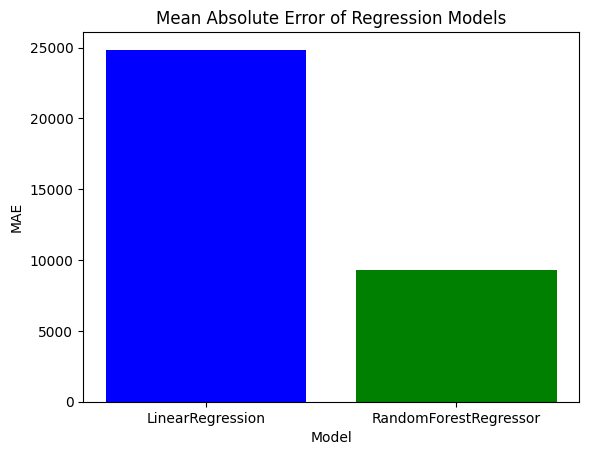

In [65]:
mae_linreg = accuracyValid.at['validation_outlier','LinearRegression']
mae_rfreg = accuracyValid.at['validation_outlier','RandomForest']

mae_data = {'Model': ['LinearRegression', 'RandomForestRegressor'], 'MAE': [mae_linreg, mae_rfreg]}
mae_df = pd.DataFrame(mae_data)
fig, ax = plt.subplots()
ax.bar(mae_df['Model'], mae_df['MAE'], color=['blue', 'green'])
ax.set_xlabel('Model')
ax.set_ylabel('MAE')
ax.set_title('Mean Absolute Error of Regression Models')
plt.show()

#### => Chọn mô hình RandomForest
  RandomForest là mô hình có MAE thấp nhất với dữ liệu được xử lý ngoại lệ ở
tập dữ liệu xác thực nên sẽ chọn mô hình và loại dữ liệu này để kiểm thử.


In [66]:
column_names = ['RandomForest']
row_names = ['test', 'test_outlier']
accuracyTest1 = pd.DataFrame(columns=column_names, index=row_names)

model1 = RandomForestRegressor()

model1.fit(train_data_copy,train_target)
test_pred = model1.predict(test_data_copy)
MAE_non_test = mean_absolute_error(test_target, test_pred) 

model1.fit(train_data,train_target)   
test_pred2 = model1.predict(test_data)
MAE_outlier_test = mean_absolute_error(test_target, test_pred2) 
    
accuracyTest1.at['test','RandomForest'] = MAE_non_test
accuracyTest1.at['test_outlier','RandomForest'] = MAE_outlier_test
print(accuracyTest1)

C:\Users\Thanh Dat\AppData\Local\Temp\ipykernel_25564\1620563635.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(train_data_copy,train_target)
C:\Users\Thanh Dat\AppData\Local\Temp\ipykernel_25564\1620563635.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(train_data,train_target)


              RandomForest
test          14301.841049
test_outlier  12636.820757


#### Tìm các siêu tham số để tối ưu mô hình

In [67]:
# Tên các cột
column_names = ['RandomForest']

# Tên các hàng
row_names = ['test', 'test_outlier']

# Tạo DataFrame với các tên cột và hàng
accuracyTest = pd.DataFrame(columns=column_names, index=row_names)

param_grid = {
        'n_estimators': [ 10, 50 ,100, 200], # số cây trong rừng
        'max_depth': [5, 10, 15], # độ sâu tối đa của cây
        #'min_samples_split': [2, 4, 6], # số lượng dữ liệu tối thiểu để phân chia mỗi node
    }

    # Define the model
rf = RandomForestRegressor()

    # GridSearchCV to find the best parameters
model2 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
    # Fit the GridSearchCV to the data

model2.fit(train_data_copy, train_target)
test_pred = model2.predict(test_data_copy)
MAE_non_test = mean_absolute_error(test_target, test_pred) 
   
model2.fit(train_data, train_target) 
test_pred2 = model2.predict(test_data)
MAE_outlier_test = mean_absolute_error(test_target, test_pred2) 
    
accuracyTest.at['test','RandomForest'] = MAE_non_test
accuracyTest.at['test_outlier','RandomForest'] = MAE_outlier_test
    
print("Table Accuracy Test:\n",accuracyTest  ,"\nBest params of mode\n",(model2.best_params_))

c:\Users\Thanh Dat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Thanh Dat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Thanh Dat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Thanh Dat\AppData\L

Table Accuracy Test:
               RandomForest
test          12257.171391
test_outlier  15693.030719 
Best params of mode
 {'max_depth': 10, 'n_estimators': 10}


c:\Users\Thanh Dat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [68]:
# Tên các cột
column_names = ['Index','Road','Square','Encoded Addresses','Du doan','Thuc te']
row_names = [0,1,2,3,4,5,6,7,8,9]
finish = pd.DataFrame(columns=column_names, index=row_names)

for i in range(10):
    random_index = test_data.sample().index[0]
    datatrain_random = test_data.loc[random_index]
    datatest_random = test_target.loc[random_index]
    
    test_data_random = datatrain_random.to_frame().T
    test_target_random = datatest_random.to_frame().T
    test_pred_random = np.round(model1.predict(test_data_random),2)
    
    finish.at[i,'Index'] = random_index
    finish.at[i,'Road'] = test_data_random.iloc[0,0]
    # finish.at[i,'Price'] = test_data_random.iloc[0,1]
    finish.at[i,'Square'] = test_data_random.iloc[0,1]
    finish.at[i,'Encoded Addresses'] = test_data_random.iloc[0,2]
    finish.at[i,'Du doan'] = test_pred_random[0]
    finish.at[i,'Thuc te'] = test_target_random.iloc[0,0]
        
    valueMAE = mean_absolute_error(test_target_random, test_pred_random) 

    # print("Lần dự đoán thứ {}: \nDữ liệu đầu vào: \n{}\n\nGiá trị thực tế: \n{}\n\nGiá trị dự đoán: \n\t{}\nMAE: {:.2f}\n".format(
    #     i+1,  test_data_random, test_target_random, test_pred_random, valueMAE))
print(finish)

  Index  Road Square Encoded Addresses   Du doan   Thuc te
0   418  20.5   40.0             237.0  10401.44   24000.0
1   527   1.0   90.0             162.0   7790.71    9500.4
2   198   3.0   80.0              57.0   2046.74    1470.4
3   401   5.0   45.0              99.0   1970.95   2380.05
4   200   4.0   74.0              75.0   2659.08   2600.36
5   322   2.0   36.0             115.0   2112.01    1800.0
6   879   4.0  113.0             162.0   6692.45  10699.97
7   133   5.0   70.0             223.0  10352.02    8199.8
8   325   4.0   43.0             111.0   2590.04   2800.16
9   369   4.0   85.0             197.0  12507.69   10900.4
